In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import openweathermapy as owm
import datetime
import seaborn as sns
now = datetime.datetime.now()

# CLEANING AND MERGING DATA



In [2]:
#load CSV

Country_Dictionary = "Resources/dictionary.csv"
summercsv = "Resources/summer.csv"
wintercsv = "Resources/winter.csv"
winterHostcsv = "Resources/winter_hosts.xlsx"
summerHostcsv = "Resources/summer_hosts.xlsx"


summer_pd = pd.read_csv(summercsv, low_memory=False)
winter_pd = pd.read_csv(wintercsv, low_memory = False)
dict_pd = pd.read_csv(Country_Dictionary, low_memory = False)
win_host = pd.read_excel(winterHostcsv)
sum_host = pd.read_excel(summerHostcsv)

#change column name of Country on summer/winter DF
summer_pd = summer_pd.rename(columns={"Country":"Code"})
winter_pd = winter_pd.rename(columns={"Country":"Code"})

#Change URS TO RUS

summer_pd["Code"] = summer_pd["Code"].replace("URS", "RUS") 
winter_pd["Code"] = winter_pd["Code"].replace("URS", "RUS") 
#summer_pd["Country"].unique()


#MERGE DATAFRAMES ON COUNTRY CODE
summer_merge = pd.merge(summer_pd, dict_pd, on="Code")
winter_merge = pd.merge(winter_pd, dict_pd, on="Code")

#MERGE DATAFRAMES TO INCLUDE HOST COUNTRY on YEAR
summer_merge = pd.merge(summer_merge, sum_host, on="Year")
winter_merge = pd.merge(winter_merge, win_host, on="Year")


#winter_merge.head(-100)

#winter_merge.head(5)

# BY COUNTRY

### Summer Games by Country

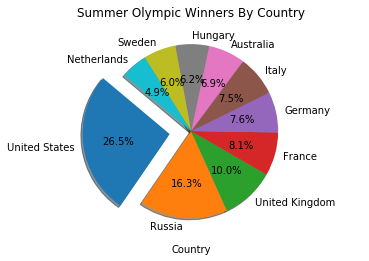

In [3]:
#PIE CHART FOR BY COUNTRY WINS, TOP 5 in each summer

#winter_pd["Athlete"].value_counts().head(5).index.tolist()

#print(winter_merge["Country"].value_counts().head())
sum_oly_pie = summer_merge["Country"].value_counts().head(10).values.tolist()
sum_oly_lab = summer_merge["Country"].value_counts().head(10).index.tolist()

explode = (0.25,0,0,0,0,0,0,0,0,0)
plt.axis("equal")

plt.pie(sum_oly_pie, explode=explode, labels=sum_oly_lab, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Summer Olympic Winners By Country")
plt.xlabel("Country")
plt.savefig("Sum_Oly_wins_byCountry.png")
plt.show()

### Winter Games by Country

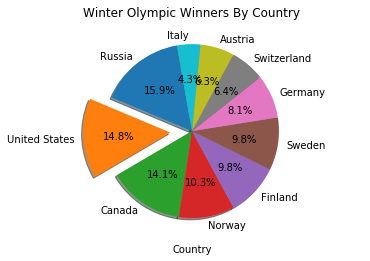

In [4]:
#PIE CHART FOR BY COUNTRY WINS, TOP 5 in each WINTER

#winter_pd["Athlete"].value_counts().head(5).index.tolist()

#print(winter_merge["Country"].value_counts().head())
win_oly_pie = winter_merge["Country"].value_counts().head(10).values.tolist()
win_oly_lab = winter_merge["Country"].value_counts().head(10).index.tolist()

explode = (0,0.25,0,0,0,0,0,0,0,0)
plt.axis("equal")

plt.pie(win_oly_pie, explode=explode, labels=win_oly_lab, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Winter Olympic Winners By Country")
plt.xlabel("Country")
plt.savefig("Win_Oly_wins_byCountry.png")
plt.show()

# Patterns by Sex

### Summer Common Winners by Sex

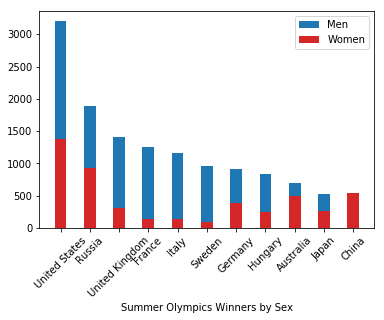

In [5]:
#MEN VS WOMEN STUFF


men_summer = summer_merge.loc[summer_merge["Gender"] == "Men"]
women_summer = summer_merge.loc[summer_merge["Gender"] == "Women"]

men_winter = winter_merge.loc[winter_merge["Gender"] == "Men"]
women_winter = winter_merge.loc[winter_merge["Gender"] == "Women"]

#MEN
Men_Sum_byCountry = men_summer["Country"].value_counts()
Men_Win_byCountry = men_winter["Country"].value_counts()

#Women

Women_Sum_byCountry = women_summer["Country"].value_counts()
Women_Win_byCountry = women_winter["Country"].value_counts()

#Total Medal Winning men - 20512  // Total Medal Winning Women - 7279
#Men_Sum_byCountry.sum()

#Men_Sum_byCountry


Women_Sum_byCountry.head(20)
#Men_Sum_byCountry.head(25)

#SUMMER CHART MENS/WOMENS
n = 11
sum_women = (1377,932,308,142,135,91,389,245,493,263,537)
sum_men = (3208,1885,1412,1254,1161,953,916,834,696,525,270)
x_axis = np.arange(n)
width = 0.4

bar1 = plt.bar(x_axis, sum_men, width, color = 'C0')
bar2 = plt.bar(x_axis, sum_women, width, color = 'C3')
plt.xticks(x_axis, ('United States','Russia','United Kingdom', 'France', 'Italy', 'Sweden', 'Germany', 'Hungary','Australia', 'Japan','China'),rotation=45)
plt.legend((bar1[0], bar2[0]), ('Men', 'Women'))
plt.xlabel("Summer Olympics Winners by Sex")
plt.savefig("Sum_Oly_wins_bySex.png")

plt.show()

### Winter Common Winners by Sex

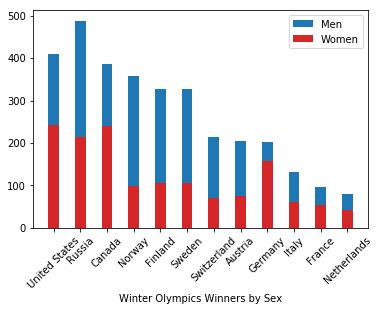

In [6]:
#WINTER MEN/WOMEN

#Women_Win_byCountry.head(20)
Men_Win_byCountry.head(25)

n=12

win_women = (243,215,239,98,106,106,71,75,157,61,55,43)
win_men = (410,488,386,359,328,327,214,205,203,131,97,79)
x_axis = np.arange(n)
width = 0.4

bar1 = plt.bar(x_axis, win_men, width, color = 'C0')
bar2 = plt.bar(x_axis, win_women, width, color = 'C3')
plt.xticks(x_axis, ('United States', 'Russia', 'Canada','Norway','Finland','Sweden','Switzerland','Austria','Germany','Italy','France','Netherlands'),rotation=45)
plt.legend((bar1[0], bar2[0]), ('Men', 'Women'))
plt.xlabel("Winter Olympics Winners by Sex")
plt.savefig("Win_Oly_wins_bySex.png")
plt.show()

# Most Decorated Athletes (all medals)


### Winter

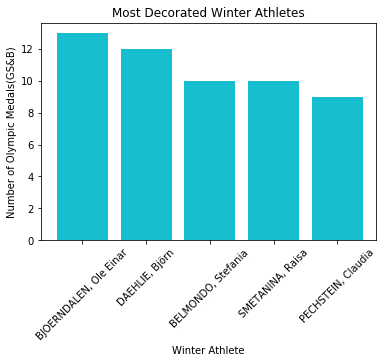

In [7]:
winter_athletes = winter_pd["Athlete"].value_counts().head(5).values.tolist()

x_axis = np.arange(5)
plt.bar(x_axis, winter_athletes, align="edge", color='C9')
tick_locations = [value+0.4 for value in x_axis]


plt.xticks(tick_locations, winter_pd["Athlete"].value_counts().head(5).index.tolist(), rotation=45)

plt.xlim(-0.25, len(x_axis))
plt.title("Most Decorated Winter Athletes")
plt.ylabel("Number of Olympic Medals(GS&B)")
plt.xlabel("Winter Athlete")
plt.savefig("Decorated_Winter_Athletes.png")
plt.show()

### Summer 

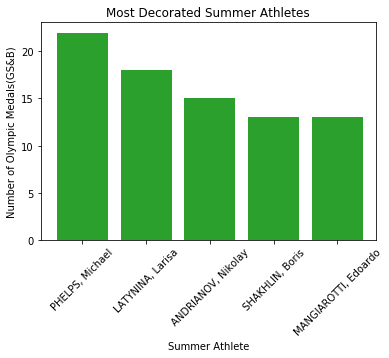

In [8]:
summer_athletes = summer_pd["Athlete"].value_counts().head(5).values.tolist()

x_axis = np.arange(5)
plt.bar(x_axis, summer_athletes, align="edge", color='C2')
tick_locations = [value+0.4 for value in x_axis]

plt.xticks(tick_locations, summer_pd["Athlete"].value_counts().head(5).index.tolist(),rotation=45)

plt.xlim(-0.25, len(x_axis))
plt.title("Most Decorated Summer Athletes")
plt.ylabel("Number of Olympic Medals(GS&B)")
plt.xlabel("Summer Athlete")
plt.savefig("Decorated Summer Athletes.png")
plt.show()

# Most Celebrated Athletes (Gold Only)

### Winter

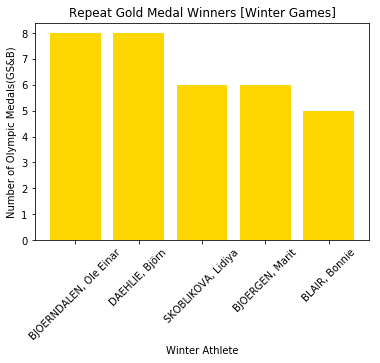

In [30]:
#ATHLETE Gold VALUE COUNTS

goldsummer_pd = summer_merge.loc[summer_merge["Medal"] == "Gold"]
goldwinter_pd = winter_merge.loc[winter_merge["Medal"]=="Gold"]
#goldsummer_pd.head()
#goldsummer_pd["Country"].value_counts().head()
Athlete_sum_gold = goldsummer_pd["Athlete"].value_counts().head(5).values.tolist()
Athlete_win_gold = goldwinter_pd["Athlete"].value_counts().head(5).values.tolist()

#goldsummer_pd.head()


x_axis = np.arange(5)
plt.bar(x_axis, Athlete_win_gold, align="edge", color='gold')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, goldwinter_pd["Athlete"].value_counts().head(5).index.tolist(), rotation=45)

#plt.xlim(-0.25, len(x_axis))
plt.title("Repeat Gold Medal Winners [Winter Games]")
plt.ylabel("Number of Olympic Medals(GS&B)")
plt.xlabel("Winter Athlete")
plt.show()


### Summer 

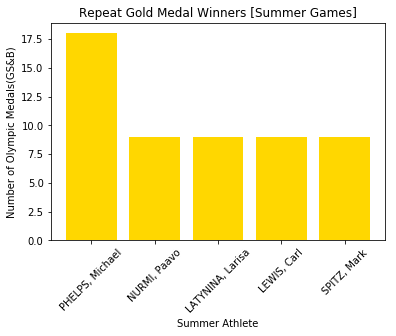

In [31]:
x_axis = np.arange(5)
plt.bar(x_axis, Athlete_sum_gold, align="edge", color='gold')
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, goldsummer_pd["Athlete"].value_counts().head(5).index.tolist(), rotation=45)

#plt.xlim(-0.25, len(x_axis))
plt.title("Repeat Gold Medal Winners [Summer Games]")
plt.ylabel("Number of Olympic Medals(GS&B)")
plt.xlabel("Summer Athlete")
plt.show()

# GDP by Capita's Effect on Olympic Wins

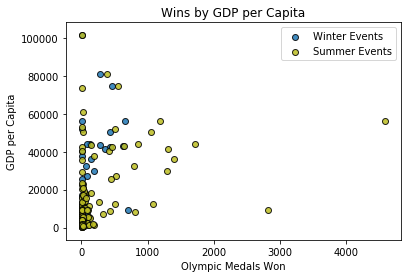

In [9]:
#GDP PER CAPITA BY WINS GRAPH
#INCLUDE BOTH WINTER AND SUMMER DATA

GDP_win = winter_merge["Country"].value_counts()
GDP_sum = summer_merge["Country"].value_counts()

test = pd.DataFrame(GDP_win)
test.reset_index(inplace=True)

test = test.rename(columns={"Country":"Wins","index":"Country"})
GDP_win1 = pd.merge(dict_pd, test, on="Country")

GDP_win1.head()


test2 = pd.DataFrame(GDP_sum)
test2.reset_index(inplace=True)
test2=test2.rename(columns={"Country":"Wins","index":"Country"})

GDP_sum1 = pd.merge(dict_pd, test2, on="Country")

w_medals = GDP_win1["Wins"] 
w_GDP = GDP_win1["GDP per Capita"]

s_medals = GDP_sum1["Wins"] 
s_GDP = GDP_sum1["GDP per Capita"]

bub_w = plt.scatter(w_medals, w_GDP, c='C0', label="Winter Events", alpha=0.85, edgecolor="black")
bub_s = plt.scatter(s_medals, s_GDP, c='C8', label="Summer Events", alpha=0.85, edgecolor="black")

legend = plt.legend(handles=[bub_w,bub_s])

plt.title("Wins by GDP per Capita")
plt.xlabel("Olympic Medals Won")
plt.ylabel("GDP per Capita")
plt.savefig("Wins_per_GDP.png")

plt.show()

# Quantifying Home Team Advantage

In [10]:
#making smaller datasets where host=country[ALL MEDALS]


#ALL MEDAL WINNERS, HOST = WINNER COUNTRY
Host_All_Summer = summer_merge.loc[summer_merge["Country"] == summer_merge["Host"]]
Host_All_Winter = winter_merge.loc[winter_merge["Country"] == winter_merge["Host"]]

#GOLD MEDAL WINNERS, HOST = WINNER COUNTRY
Host_Gold_Summer = Host_All_Summer.loc[Host_All_Summer["Medal"] == "Gold"]
Host_Gold_Winter = Host_All_Winter.loc[Host_All_Winter["Medal"]=="Gold"]

#ALL MEDAL WINNERS, host NOT winner Country
Not_Host_All_Summer = summer_merge.loc[summer_merge["Country"] != summer_merge["Host"]]
Not_Host_All_Winter = winter_merge.loc[winter_merge["Country"] != winter_merge["Host"]]

Not_Host_Gold_Summer = Not_Host_All_Summer.loc[Not_Host_All_Summer["Medal"] == "Gold"]
Not_Host_Gold_Winter = Not_Host_All_Winter.loc[Not_Host_All_Winter["Medal"]=="Gold"]


Not_Host_Gold_Winter.head(-5)

Year               City       Sport            Discipline  \
12    1924           Chamonix    Biathlon              Biathlon   
13    1924           Chamonix    Biathlon              Biathlon   
14    1924           Chamonix    Biathlon              Biathlon   
15    1924           Chamonix    Biathlon              Biathlon   
16    1924           Chamonix   Bobsleigh             Bobsleigh   
17    1924           Chamonix   Bobsleigh             Bobsleigh   
18    1924           Chamonix   Bobsleigh             Bobsleigh   
19    1924           Chamonix   Bobsleigh             Bobsleigh   
27    1924           Chamonix     Skating         Speed skating   
29    1924           Chamonix     Skating         Speed skating   
30    1924           Chamonix     Skating         Speed skating   
34    1924           Chamonix     Skating         Speed skating   
45    1924           Chamonix     Curling               Curling   
46    1924           Chamonix     Curling               Curling   
47    1924           Chamonix     Curling               Curling   
48    1924           Chamonix     Curling               Curling   
49    1924           Chamonix     Curling               Curling   
50    1924           Chamonix     Curling               Curling   
51    1924           Chamonix     Curling               Curling   
52    1924           Chamonix     Curling               Curling   
74    1924           Chamonix     Skating        Figure skating   
75    1924           Chamonix  Ice Hockey            Ice Hockey   
76    1924           Chamonix  Ice Hockey            Ice Hockey   
77    1924           Chamonix  Ice Hockey            Ice Hockey   
78    1924           Chamonix  Ice Hockey            Ice Hockey   
79    1924           Chamonix  Ice Hockey            Ice Hockey   
80    1924           Chamonix  Ice Hockey            Ice Hockey   
81    1924           Chamonix  Ice Hockey            Ice Hockey   
82    1924           Chamonix  Ice Hockey            Ice Hockey   
83    1924           Chamonix  Ice Hockey            Ice Hockey   
...    ...                ...         ...                   ...   
5197  1956  Cortina d'Ampezzo     Skating        Figure skating   
5199  1956  Cortina d'Ampezzo     Skating        Figure skating   
5202  1956  Cortina d'Ampezzo     Skating        Figure skating   
5203  1956  Cortina d'Ampezzo     Skating        Figure skating   
5205  1956  Cortina d'Ampezzo      Skiing         Alpine Skiing   
5207  1956  Cortina d'Ampezzo      Skiing         Alpine Skiing   
5211  1956  Cortina d'Ampezzo      Skiing         Alpine Skiing   
5215  1956  Cortina d'Ampezzo      Skiing  Cross Country Skiing   
5216  1956  Cortina d'Ampezzo      Skiing       Nordic Combined   
5227  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5228  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5229  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5230  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5231  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5232  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5233  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5234  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5235  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5236  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5237  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5238  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5239  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5240  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5241  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5242  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5243  1956  Cortina d'Ampezzo  Ice Hockey            Ice Hockey   
5245  1956  Cortina d'Ampezzo     Skating         Speed skating   
5246  1956  Cortina d'Ampezzo     Skating         Spe

In [11]:
# Create API key and preferred units
api_key = "7f565398c1a0ab6b2dde537d78e10dc8"
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}

# WINTER DATAFRAME

In [12]:
# Get data for each country in winter dataframe
winter_weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nCollecting Country Information\n")
#Search OpenWeatherMap and store the response into winter_weather_data if response is found
for index,row in win_host.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["Host City"], row["Host"]))
    try:
        response = owm.get_current("%s,%s"%(row["Host City"],row["Host"]), **settings)
        print("\n"+url+"%s,%s"%(row["Host City"],row["Host"]))
        # Appending the response to the weather_Data
        winter_weather_data.append(response)
    except:
        print("\nCountry Not Found\n")

print("\n-----------------------------\nInformation Collection Complete\n-----------------------------")




Processing record 1|Paris,France

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Paris,France

Processing record 2|Bern,Switzerland

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Bern,Switzerland

Processing record 3|Albany,United States

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Albany,United States

Processing record 4|Berlin,Germany

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Berlin,Germany

Processing record 5|Tokyo,Japan

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Tokyo,Japan

Processing record 6|Rome,Italy

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Rome,Italy

Processing record 7|Bern,Switzerland

https://api.openweatherma

In [13]:
# Create object to to form the weather data table
summary = ["name","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in winter_weather_data]
column_names = ["Host City","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
winter_weather_data = pd.DataFrame(data, columns=column_names)

winter_weather_data.head()

Host City        Date  Latitude  Longitude  Temperature  Humidity  \
0     Paris  1515722400     48.86       2.35         42.8        93   
1      Bern  1515720000     46.95       7.45         41.0       100   
2    Albany  1515722040     42.65     -73.75         53.6        81   
3    Berlin  1515721800     52.52      13.39         35.6       100   
4     Tokyo  1515722160     35.68     139.76         39.2        25   

   Wind speed  Cloudliness  
0        6.93           90  
1        1.12           80  
2        8.05           75  
3        4.70           90  
4        5.82            1

# SUMMER DATAFRAME

In [14]:
# Get data for each country in summer dataframe
summer_weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nCollecting Country Information\n")
#Search OpenWeatherMap and store the response into winter_weather_data if response is found
for index,row in sum_host.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["Host City"], row["Host"]))
    try:
        response = owm.get_current("%s,%s"%(row["Host City"],row["Host"]), **settings)
        print("\n"+url+"%s,%s"%(row["Host City"],row["Host"]))
        # Appending the response to the weather_Data
        summer_weather_data.append(response)
    except:
        print("\nCountry Not Found\n")

print("\n-----------------------------\nInformation Collection Complete\n-----------------------------")




Processing record 1|Athens,Greece

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Athens,Greece

Processing record 2|Paris,France

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Paris,France

Processing record 3|Chicago,United States

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Chicago,United States

Processing record 4|London,England

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=London,England

Processing record 5|Stockholm,Sweden

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Stockholm,Sweden

Processing record 6|Berlin,Germany

https://api.openweathermap.org/data/2.5/weather?appid=7f565398c1a0ab6b2dde537d78e10dc8&units=imperial&q=Berlin,Germany

Processing record 7|Antwerp,Belgium

https://api.

In [15]:
# Create object to to form the weather data table
summary1 = ["name","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary1) for response in summer_weather_data]
column_names = ["Host City","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
summer_weather_data = pd.DataFrame(data, columns=column_names)

summer_weather_data.head()

Host City        Date  Latitude  Longitude  Temperature  Humidity  \
0     Athens  1515722100     34.80     -86.97         64.4        93   
1      Paris  1515722400     48.86       2.35         42.8        93   
2    Chicago  1515720900     41.88     -87.62         44.6        93   
3     London  1515721800     51.51      -0.13         44.6        93   
4  Stockholm  1515721800     59.33      18.07         33.8        91   

   Wind speed  Cloudliness  
0        9.17           90  
1        6.93           90  
2       16.11           90  
3        3.36           90  
4        9.17           88

# Create Weather Charts

In [16]:
#merge summer and winter dataframes to create chart
summer_weather_merge = pd.merge(summer_merge, summer_weather_data, on="Host City")
winter_weather_merge = pd.merge(winter_merge, winter_weather_data, on="Host City")

summer_weather_merge.head(10)

Year    City      Sport Discipline           Athlete Code Gender  \
0  1896  Athens   Aquatics   Swimming     HAJOS, Alfred  HUN    Men   
1  1896  Athens   Aquatics   Swimming     HAJOS, Alfred  HUN    Men   
2  1896  Athens   Aquatics   Swimming     HAJOS, Alfred  HUN    Men   
3  1896  Athens   Aquatics   Swimming     HAJOS, Alfred  HUN    Men   
4  1896  Athens  Athletics  Athletics  SZOKOLYI, Alajos  HUN    Men   
5  1896  Athens  Athletics  Athletics  SZOKOLYI, Alajos  HUN    Men   
6  1896  Athens  Athletics  Athletics      DANI, Nandor  HUN    Men   
7  1896  Athens  Athletics  Athletics      DANI, Nandor  HUN    Men   
8  1896  Athens  Athletics  Athletics    KELLNER, Gyula  HUN    Men   
9  1896  Athens  Athletics  Athletics    KELLNER, Gyula  HUN    Men   

             Event   Medal  Country     ...       GDP per Capita  Host City  \
0   100M Freestyle    Gold  Hungary     ...          12363.54346     Athens   
1   100M Freestyle    Gold  Hungary     ...          12363.54346     Athens   
2  1200M Freestyle    Gold  Hungary     ...          12363.54346     Athens   
3  1200M Freestyle    Gold  Hungary     ...          12363.54346     Athens   
4             100M  Bronze  Hungary     ...          12363.54346     Athens   
5             100M  Bronze  Hungary     ...          12363.54346     Athens   
6             800M  Silver  Hungary     ...          12363.54346     Athens   
7             800M  Silver  Hungary     ...          12363.54346     Athens   
8         Marathon  Bronze  Hungary     ...          12363.54346     Athens   
9         Marathon  Bronze  Hungary     ...          12363.54346     Athens   

     Host        Date  Latitude  Longitude  Temperature  Humidity  Wind speed  \
0  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
1  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
2  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
3  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
4  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
5  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
6  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
7  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
8  Greece  1515722100      34.8     -86.97         64.4        93        9.17   
9  Greece  1515722100      34.8     -86.97         64.4        93        9.17   

   Cloudliness  
0           90  
1           90  
2           90  
3           90  
4           90  
5           90  
6           90  
7           90  
8           90  
9           90  

[10 rows x 21 columns]

In [17]:
#find values for summer medal count and latitude
summer_bubble_plot_df1 = summer_weather_merge.groupby(["Country", "Population"],as_index=True).count()["Medal"].to_frame().reset_index()
summer_bubble_plot_df2 = summer_weather_merge.groupby(["Country", "Population"],as_index=True).mean()["Latitude"].to_frame().reset_index()
summer_bubble_plot_df = pd.merge(summer_bubble_plot_df1,summer_bubble_plot_df2,
                                on=["Country", "Population"])
summer_bubble_plot_df.head(10)



Country  Population  Medal   Latitude
0  Afghanistan  32526562.0      5  49.190000
1      Algeria  39666519.0     18  20.460000
2    Argentina  43416755.0    406  39.853005
3      Armenia   3017712.0     17  40.305294
4    Australia  23781169.0   1853  31.406999
5      Austria   8611088.0    226  44.731726
6   Azerbaijan   9651349.0     61  42.950328
7      Bahamas    388019.0     45  29.075556
8      Bahrain   1377237.0      4  51.510000
9     Barbados    284215.0      1 -33.850000

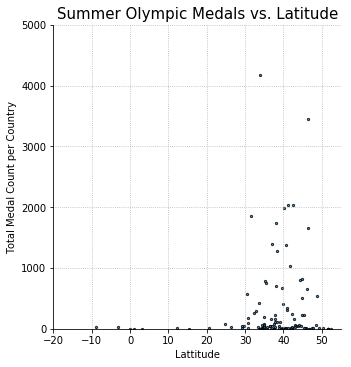

In [18]:
#create country medal count vs. latitude scatter plot for summer games
size = 5
sns.lmplot(x="Latitude", y="Medal", data=summer_bubble_plot_df,
          fit_reg=False, legend_out=False,
          size=5,scatter_kws={"s": size, 'linewidths':1, 'edgecolor':'black'})
plt.grid(linestyle="dotted")
plt.xlim(-20,55)
plt.ylim(0,5000)
plt.title("Summer Olympic Medals vs. Latitude", fontsize=15)
plt.xlabel("Lattitude")
plt.ylabel("Total Medal Count per Country")
plt.savefig("Sum_Oly_wins_byLatitude.png")

plt.show()

In [19]:
#find values for summer medal count and latitude
winter_bubble_plot_df1 = winter_weather_merge.groupby(["Country", "Population"],as_index=True).count()["Medal"].to_frame().reset_index()
winter_bubble_plot_df2 = winter_weather_merge.groupby(["Country", "Population"],as_index=True).mean()["Latitude"].to_frame().reset_index()
winter_bubble_plot_df = pd.merge(winter_bubble_plot_df1,winter_bubble_plot_df2,
                                on=["Country", "Population"])
winter_bubble_plot_df.head(10)

Country    Population  Medal   Latitude
0       Australia  2.378117e+07     15  48.090000
1         Austria  8.611088e+06    340  45.619971
2         Belarus  9.513000e+06     15  45.352000
3         Belgium  1.128572e+07     20  46.912000
4        Bulgaria  7.177991e+06      7  41.524286
5          Canada  3.585177e+07    709  45.294358
6           China  1.371220e+09     82  43.392195
7         Croatia  4.224404e+06     11  43.689091
8  Czech Republic  1.055122e+07     75  42.070000
9         Denmark  5.676002e+06      5  36.640000

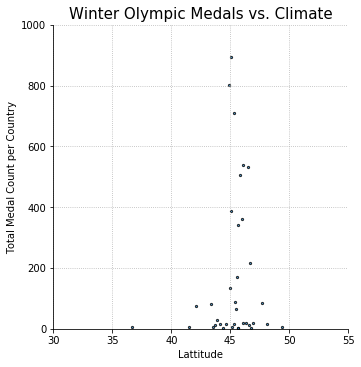

In [20]:
#create country medal count vs. latitude scatter plot for winter games
size = 5
sns.lmplot(x="Latitude", y="Medal", data=winter_bubble_plot_df,
          fit_reg=False, legend_out=False,
          size=5,scatter_kws={"s": size, 'linewidths':1, 'edgecolor':'black'})
plt.grid(linestyle="dotted")
plt.xlim(30,55)
plt.ylim(0,1000)
plt.title("Winter Olympic Medals vs. Climate", fontsize=15)
plt.xlabel("Lattitude")
plt.ylabel("Total Medal Count per Country")
plt.savefig("Win_Oly_wins_byLatitude.png")

plt.show()

# Host Medals Won

In [21]:
#HOST VS NOT HOST

#ALL MEDAL WINNERS, HOST = WINNER COUNTRY
Host_All_Summer = summer_merge.loc[summer_merge["Country"] == summer_merge["Host"]]
Host_All_Winter = winter_merge.loc[winter_merge["Country"] == winter_merge["Host"]]

#ALL MEDAL WINNERS, host NOT winner Country
Not_Host_All_Summer = summer_merge.loc[summer_merge["Country"] != summer_merge["Host"]]
Not_Host_All_Winter = winter_merge.loc[winter_merge["Country"] != winter_merge["Host"]]

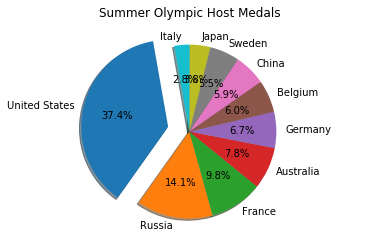

In [22]:
#Pie Chart for Summer Host Wins - Top 10

#print(winter_merge["Country"].value_counts().head())
summer_host_pie = Host_All_Summer["Country"].value_counts().head(10).values.tolist()
summer_host_lab = Host_All_Summer["Country"].value_counts().head(10).index.tolist()

explode = (0.25,0,0,0,0,0,0,0,0,0,)
plt.axis("equal")

plt.pie(summer_host_pie, explode=explode, labels=summer_host_lab, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Summer Olympic Host Medals")
plt.savefig("Summer_Host_Wins.png")
plt.show()

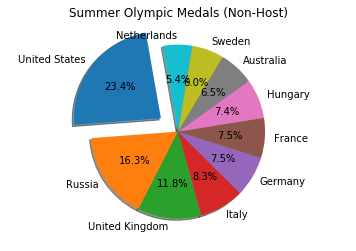

In [23]:
#Pie Chart for Summer Not Host Wins - Top 10

#print(winter_merge["Country"].value_counts().head())
not_summer_host_pie = Not_Host_All_Summer["Country"].value_counts().head(10).values.tolist()
not_summer_host_lab = Not_Host_All_Summer["Country"].value_counts().head(10).index.tolist()

explode = (0.25,0,0,0,0,0,0,0,0,0)
plt.axis("equal")

plt.pie(not_summer_host_pie, explode=explode, labels=not_summer_host_lab, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Summer Olympic Medals (Non-Host)")
plt.savefig("Not_Summer_Host_Wins.png")
plt.show()

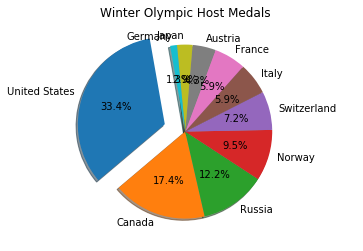

In [24]:
#Pie Chart for Winter Host Wins - Top 10

#print(winter_merge["Country"].value_counts().head())
winter_host_pie = Host_All_Winter["Country"].value_counts().head(10).values.tolist()
winter_host_lab = Host_All_Winter["Country"].value_counts().head(10).index.tolist()

explode = (0.25,0,0,0,0,0,0,0,0,0)
plt.axis("equal")

plt.pie(winter_host_pie, explode=explode, labels=winter_host_lab, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Winter Olympic Host Medals")
plt.savefig("Winter_Host_Wins.png")
plt.show()

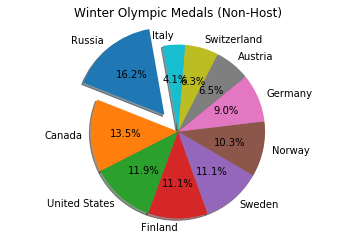

In [25]:
#Pie Chart for Winter Not Host Wins - Top 10

#print(winter_merge["Country"].value_counts().head())
not_winter_host_pie = Not_Host_All_Winter["Country"].value_counts().head(10).values.tolist()
not_winter_host_lab = Not_Host_All_Winter["Country"].value_counts().head(10).index.tolist()

explode = (0.25,0,0,0,0,0,0,0,0,0)
plt.axis("equal")

plt.pie(not_winter_host_pie, explode=explode, labels=not_winter_host_lab, autopct="%1.1f%%", shadow=True, startangle=100)
plt.title("Winter Olympic Medals (Non-Host)")
plt.savefig("Not_Winter_Host_Wins.png")
plt.show()